In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
import csv
from urllib.request import urlopen

# reads in data from the given url and 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

#print(lines)
data = pd.read_csv(url)

    
    

In [3]:
# clean the data
data = data.dropna(subset=['continent'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data

#sns.lineplot(data=data, x="date", y="new_cases", hue='iso_code')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79474,ZWE,Africa,Zimbabwe,2021-03-31,36882.0,43.0,19.000,1523.0,3.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79475,ZWE,Africa,Zimbabwe,2021-04-01,36896.0,14.0,16.857,1523.0,0.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79476,ZWE,Africa,Zimbabwe,2021-04-02,36903.0,7.0,14.000,1524.0,1.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79477,ZWE,Africa,Zimbabwe,2021-04-03,36911.0,8.0,13.286,1524.0,0.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
#top 15/bottom 15 vaccinated countries

todays_date = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
df_hc_to_date = data.loc[data['date'] == todays_date]

df_hc_to_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
405,AFG,Asia,Afghanistan,2021-04-04,56676.0,81.0,54.571,2497.0,1.0,3.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1227,ALB,Europe,Albania,2021-04-04,126531.0,348.0,342.429,2265.0,9.0,7.857,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1632,DZA,Africa,Algeria,2021-04-04,117622.0,98.0,112.286,3105.0,3.0,3.571,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2031,AND,Europe,Andorra,2021-04-04,12231.0,57.0,54.429,117.0,0.0,0.286,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2412,AGO,Africa,Angola,2021-04-04,22631.0,52.0,81.143,542.0,2.0,1.286,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77477,VEN,South America,Venezuela,2021-04-04,166123.0,1786.0,1352.571,1662.0,15.0,13.857,...,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.711
77915,VNM,Asia,Vietnam,2021-04-04,2631.0,5.0,5.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
78714,YEM,Asia,Yemen,2021-04-04,4798.0,101.0,109.286,946.0,14.0,13.571,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
79097,ZMB,Africa,Zambia,2021-04-04,88930.0,130.0,151.143,1220.0,5.0,2.857,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584


In [5]:
#df_hc_to_date
df_top_15_most_vaccinated = df_hc_to_date.sort_values(['people_vaccinated'], ascending=False).head(15)
df_top_15_most_vaccinated

for index,row in df_top_15_most_vaccinated.iterrows():
    print(row['location'] , "  ", row['people_vaccinated'])

United States    106214924.0
India    68678838.0
Brazil    16472281.0
Turkey    9546643.0
Indonesia    8634321.0
Mexico    7924236.0
Italy    7638451.0
Russia    7505764.0
Chile    6940748.0
Canada    5598582.0
Israel    5269051.0
Poland    4585575.0
Argentina    3550166.0
Hungary    2362839.0
Belgium    1502919.0


Text(0.5, 1.0, 'Countries With Most Vaccinated Population')

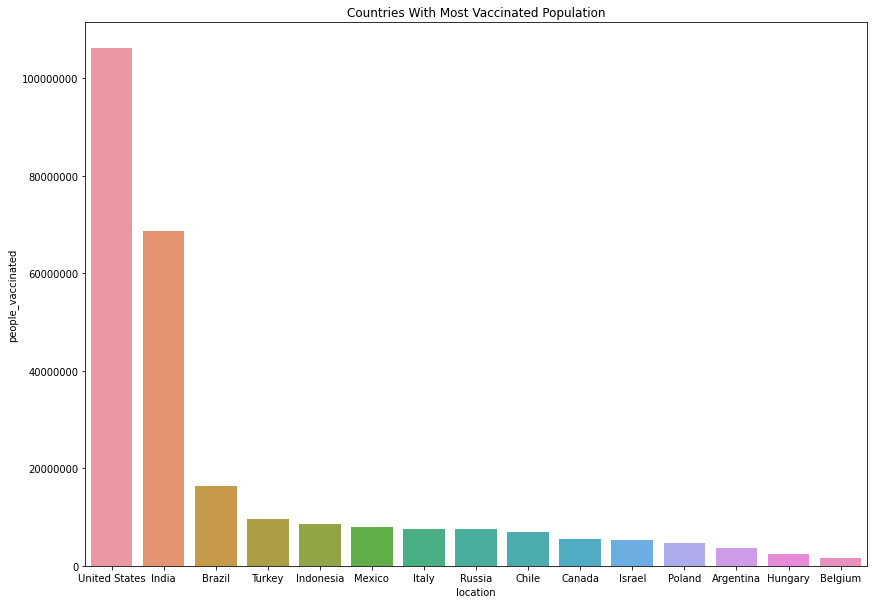

In [14]:
# TODO: title
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x="location", y="people_vaccinated", data=df_top_15_most_vaccinated).set_title('Countries With Most Vaccinated Population')

In [7]:
df_new = data[data['location'].apply(lambda x: x in df_top_15_most_vaccinated['location'].values.flatten())]
df_new

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2845,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
2846,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
2847,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
2848,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
2849,ARG,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75771,USA,North America,United States,2021-03-31,30460834.0,67029.0,64032.571,552106.0,1076.0,940.000,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
75772,USA,North America,United States,2021-04-01,30539868.0,79034.0,65687.143,553170.0,1064.0,869.286,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
75773,USA,North America,United States,2021-04-02,30609690.0,69822.0,64616.857,554103.0,933.0,842.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
75774,USA,North America,United States,2021-04-03,30671844.0,62154.0,64627.714,554779.0,676.0,833.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


Text(0.5, 1.0, 'Vaccine Progress For 15 Countries With Most Vaccinated Population')

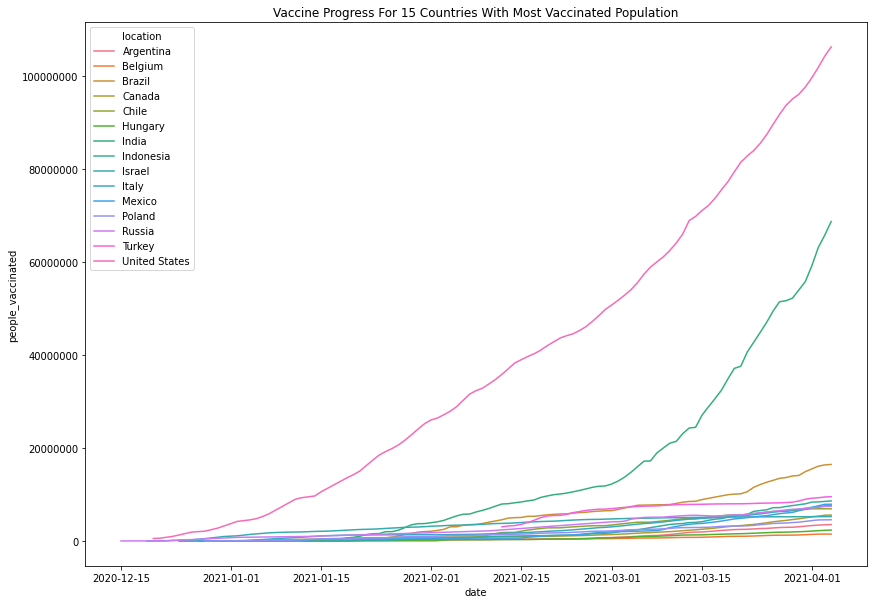

In [16]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data=df_new, x='date', y='people_vaccinated', hue='location').set_title('Vaccine Progress For 15 Countries With Most Vaccinated Population')

Text(0.5, 1.0, 'People Vaccinated vs. Extreme Poverty Levels Per Country')

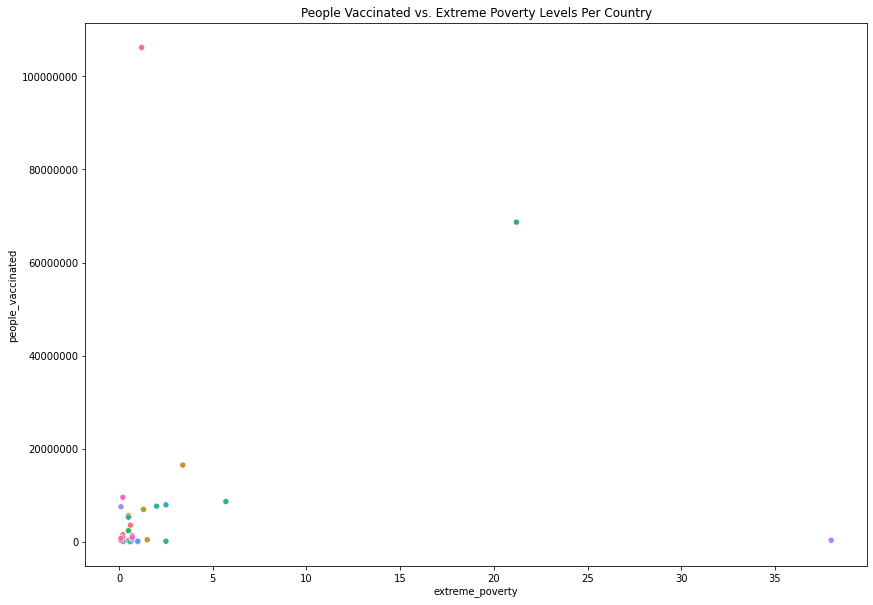

In [17]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(data=df_hc_to_date, x='extreme_poverty', y='people_vaccinated', hue='location', legend=False).set_title('People Vaccinated vs. Extreme Poverty Levels Per Country')

In [10]:
df_sum = data.groupby(['location']).sum()
df_sum.reset_index(inplace=True)
df_sum = df_sum.rename(columns = {'index':'location'})
#df_sum = df_sum[df_sum['icu_patients'] != 0]

df_sum_vaccinations = df_hc_to_date[['location', 'people_vaccinated']].dropna()

df_sum_icu_patients = df_sum[['location', 'icu_patients']]
df_sum_icu_patients = df_sum_icu_patients[df_sum_icu_patients['icu_patients'] != 0]
#df_sum_icu_patients
pd_sum_vaccines_and_icu_patients = pd.merge(df_sum_icu_patients, df_sum_vaccinations, on='location', how='inner')
pd_sum_vaccines_and_icu_patients

#pd.concat([df_sum['icu_patients'], df_hc_to_date['people_vaccinated'].dropna()], axis=0, keys=None)

,location,icu_patients,people_vaccinated
0,Austria,78255.0,1270558.0
1,Belgium,168382.0,1502919.0
2,Bulgaria,70452.0,402693.0
3,Canada,141735.0,5598582.0
4,Czechia,195481.0,1233053.0
5,Estonia,6376.0,223153.0
6,Finland,6177.0,973876.0
7,Israel,51470.0,5269051.0
8,Italy,630998.0,7638451.0
9,Slovenia,27404.0,284027.0


Text(0.5, 1.0, 'People Vaccinated vs. ICU Patients Per Country')

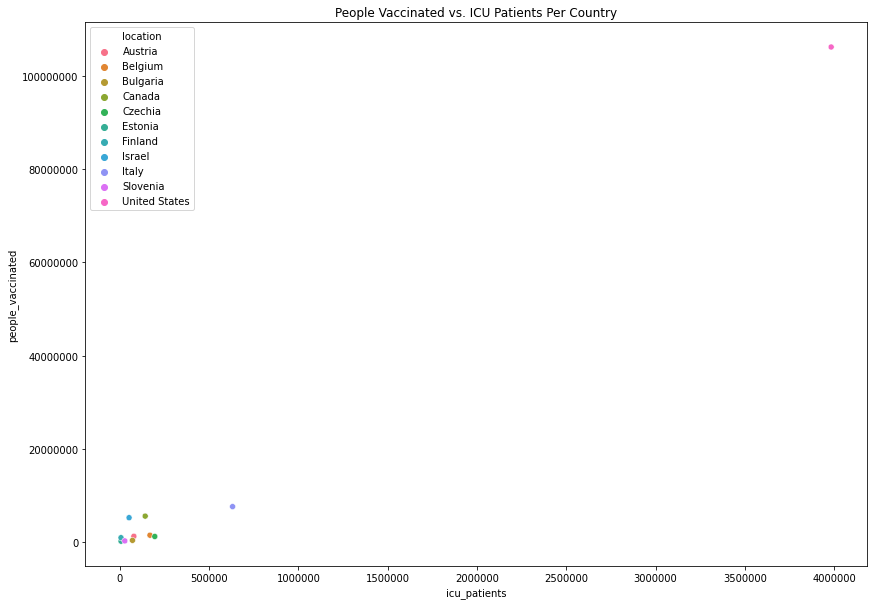

In [19]:
fig, scatter = plt.subplots(figsize = (14,10))
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data=pd_sum_vaccines_and_icu_patients, x='icu_patients', y='people_vaccinated', hue='location').set_title('People Vaccinated vs. ICU Patients Per Country')